In [1]:
import uproot
import awkward as ak
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import scipy as s
from scipy.integrate import quad
import scipy.integrate as integrate

In [2]:

# read the ttree
tree = uproot.open("../outPut_matchedFiles/output_1_Skim.root")["Events"]
# read the pf candidates and gen particle information into akward arrays
pfcands = tree.arrays(tree.keys('PF_*') + ['nPF'], entry_start=0, entry_stop=2000)
genparts = tree.arrays(tree.keys('packedGenPart_*') + ['npackedGenPart'], entry_start=0, entry_stop=2000)

#tree.show()
#print(tree.keys(filter_name="PF_*"))
#print(tree.keys(filter_name="packedGenPart_*"))
#tree.keys()
#tree.items()

#for key, value in tree.items():
    #print(key, value)
print (tree.num_entries)
#for batch in tree.iterate(step_size=500):
    #print(repr(batch))


2000


In [3]:
tree.show(filter_name="PF_*")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
PF_d0                | float[]                  | AsJagged(AsDtype('>f4'))
PF_d0Error           | float[]                  | AsJagged(AsDtype('>f4'))
PF_dz                | float[]                  | AsJagged(AsDtype('>f4'))
PF_dzError           | float[]                  | AsJagged(AsDtype('>f4'))
PF_eta               | float[]                  | AsJagged(AsDtype('>f4'))
PF_hcalFraction      | float[]                  | AsJagged(AsDtype('>f4'))
PF_mass              | float[]                  | AsJagged(AsDtype('>f4'))
PF_phi               | float[]                  | AsJagged(AsDtype('>f4'))
PF_pt                | float[]                  | AsJagged(AsDtype('>f4'))
PF_puppiWeight       | float[]                  | AsJagged(AsDtype('>f4'))
PF_puppiWeightNoLep  | float[]                  | AsJagged(AsDtype('>f4'))
PF_rawCaloFra

In [4]:
tree["PF_pt"].array()
tree["PF_ptype"].array()
for array in tree.iterate(["PF_pt", "PF_ptype"], step_size=100):
    array["PF_pt"], array["PF_ptype"]
    print(array["PF_pt"])

[[0.678, 0.558, 0.503, 0.581, 0.532, 0.875, ... 0.225, 0.713, 1.21, 0.425, 1.42]]
[[0.884, 0.894, 0.505, 0.701, 0.542, 0.544, ... 0.503, 0.37, 0.95, 0.556, 0.0869]]
[[0.946, 0.618, 0.6, 0.562, 0.581, 0.508, ... 0.704, 1.62, 2.44, 1.97, 1.53, 1.33]]
[[0.545, 0.787, 0.513, 0.637, 0.562, 0.62, ... 0.481, 0.149, 1.13, 1.47, 2.03]]
[[0.76, 0.543, 0.929, 0.742, 0.64, 0.811, ... 0.267, 2.06, 1.1, 0.604, 1.27, 0.725]]
[[0.645, 0.585, 0.657, 0.732, 0.835, 0.901, ... 0.507, 0.312, 0.738, 2.19, 0.836]]
[[0.759, 0.578, 0.922, 0.692, 0.691, 0.767, ... 1.55, 1.32, 1.1, 2.07, 0.756, 1.42]]
[[0.913, 0.799, 0.51, 0.587, 0.524, 0.614, ... 0.521, 0.702, 0.501, 0.69, 0.184]]
[[0.571, 0.896, 0.732, 0.501, 0.844, 0.516, ... 0.563, 0.675, 0.338, 0.638, 0.315]]
[[0.821, 0.679, 0.85, 0.693, 0.549, 0.927, ... 0.213, 0.309, 0.129, 0.342, 0.825]]
[[0.768, 0.651, 0.699, 0.803, 0.521, 0.927, ... 0.858, 1.41, 0.239, 2.13, 0.244]]
[[0.579, 0.504, 0.75, 0.563, 0.67, 0.528, ... 1.03, 0.266, 0.686, 0.313, 0.196]]
[[0.87

In [5]:
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

In [6]:
# charged particles
ispfChg  = pfcands['PF_charge']!=0
# charged particles from the primary vertex
ispfChgPV  = (pfcands['PF_charge']!=0) & (pfcands['PF_puppiWeightNoLep']!=0)
# neutral particles
ispfNeu  = pfcands['PF_charge']==0
# photons
ispfPho  = pfcands['PF_pdgId']==22
# neutral hadrons
ispfNeuH = pfcands['PF_pdgId']==130
# hf candidates
ispfHF   = (pfcands['PF_pdgId']==1) | (pfcands['PF_pdgId']==2)

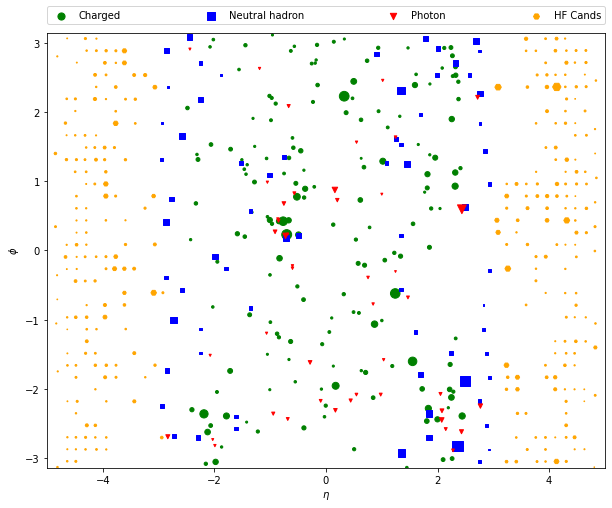

In [7]:
ievt = 4

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pfcands['PF_eta'][ispfChg][ievt],  pfcands['PF_phi'][ispfChg][ievt],  s=pfcands['PF_pt'][ispfChg][ievt]*20.0,   c='green', label='Charged')
ax.scatter(pfcands['PF_eta'][ispfNeuH][ievt], pfcands['PF_phi'][ispfNeuH][ievt], s=pfcands['PF_pt'][ispfNeuH][ievt]*20.0,  c='blue', marker='s', label='Neutral hadron')
ax.scatter(pfcands['PF_eta'][ispfPho][ievt],  pfcands['PF_phi'][ispfPho][ievt],  s=pfcands['PF_pt'][ispfPho][ievt]*20.0,   c='red',marker='v', label='Photon')
ax.scatter(pfcands['PF_eta'][ispfHF][ievt],   pfcands['PF_phi'][ispfHF][ievt],   s=pfcands['PF_pt'][ispfHF][ievt]*20.0,    c='orange',marker='H', label='HF Cands')
#ln_coll=matplotlib.collections.LineCollection(lines,linestyle='--',linewidth=0.05,colors=['grey',])
#ax.add_collection(ln_coll)
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-5.0, 5.0)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()
#plt.savefig("collection_charged.png")

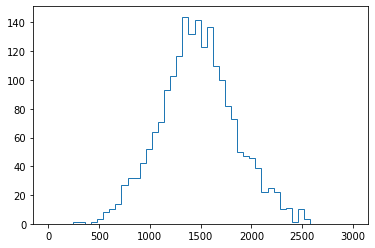

In [8]:
# plot the number of PF candidates per event
plt.figure()
plt.hist( ak.to_numpy(pfcands['nPF']), bins=50, range=(0,3000), histtype='step')
#plt.hist( ak.to_numpy(ak.ravel(pfcands['nPF'])), bins=50, range=(0,3000), histtype='step')
plt.show()
#plt.savefig("nPF.png")

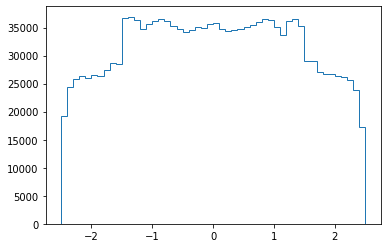

In [12]:
# plot the eta of PF candidates per event
plt.figure()
# ak.flatten/ak.ravel remove missing values (None) as well as squashing lists,
plt.hist( ak.to_numpy(ak.flatten(pfcands['PF_eta'])), bins=50, range=(-2.5,2.5), histtype='step')
array= ak.to_numpy(ak.flatten(pfcands['PF_eta']))
array.tolist()
plt.show()

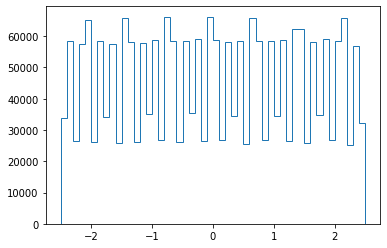

In [13]:
# plot the Phi of PF candidates per event
plt.figure()
plt.hist( ak.to_numpy(ak.flatten(pfcands['PF_phi'])), bins=50, range=(-2.5,2.5), histtype='step')
plt.show()

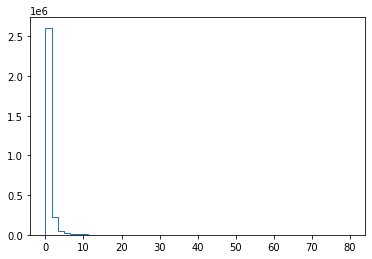

In [14]:
#plot the Pt of PF candidates

plt.figure()
plt.hist( ak.to_numpy(ak.flatten(pfcands['PF_pt'])), bins=50, range=(0,80), histtype='step')
plt.show()

In [15]:
pdgIds = ak.to_numpy(ak.flatten(pfcands['PF_pdgId']))
print("unique pdgIds: ", np.unique(pdgIds))
print("unique abs(pdgIds): ", np.unique(abs(pdgIds)))


unique pdgIds:  [-211  -13  -11    1    2   11   13   22  130  211]
unique abs(pdgIds):  [  1   2  11  13  22 130 211]


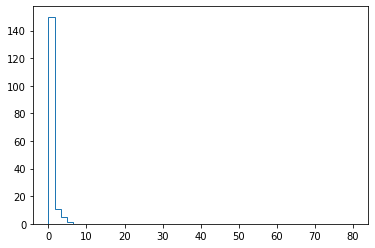

In [16]:
plt.figure()
#plt.hist( ak.to_numpy(ak.flatten(pfcands['PF_pt'])), bins=50, range=(0,80), histtype='step')
plt.hist(pfcands['PF_pt'][ispfChg][4],bins=50, range=(0,80), histtype='step')
plt.show()

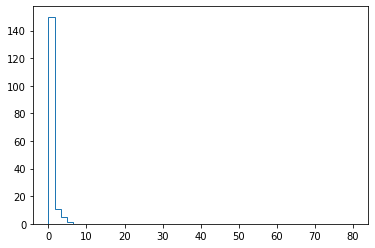

In [17]:
#plot the Pt of charged PF Candiates
plt.figure()
#plt.hist( ak.to_numpy(ak.flatten(pfcands['PF_pt'])), bins=50, range=(0,80), histtype='step')
plt.hist(pfcands['PF_pt'][ispfChg][4],bins=50, range=(0,80), histtype='step')
plt.show()


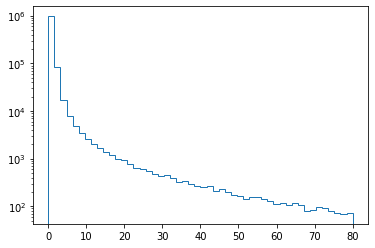

In [18]:
#plot the Pt of charged PF Candiates
plt.figure()
plt.yscale("log")
plt.hist(ak.flatten(pfcands['PF_pt'][ispfChg][:]),bins=50, range=(0,80), histtype='step')
#plt.hist(pfcands['PF_pt'][ispfChg][1],bins=50, range=(0,80), histtype='step')
plt.show()

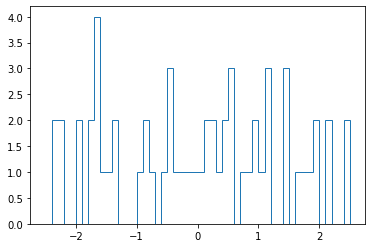

In [19]:
#plot the Phi of Neutral Hadron PF Candiates
plt.figure()
#plt.hist( ak.to_numpy(ak.flatten(pfcands['PF_pt'])), bins=50, range=(0,80), histtype='step')
plt.hist (pfcands['PF_phi'][ispfNeuH][1],bins=50, range=(-2.5,2.5), histtype='step')
plt.show()


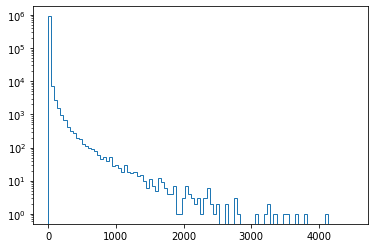

[4302224. 4302224. 4302224. 8604448.       0. 4302224. 4302224. 4302224.
 4302224. 4302224.]


In [20]:
#Plot the Pt of generated particles
plt.figure()
plt.yscale("log")
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])), bins=100, range=(0,4500), histtype='step')
plt.show()
#get the number of entries
#print(genparts["packedGenPart_pt"])
bin_width=45
total=ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])).sum()
#print(total)

n=ak.to_numpy(ak.flatten(genparts['packedGenPart_pt']))
bins2=[0,1,2,3,5,5,6,7,8,9,10]
area= total*np.diff(bins2)
print(area)

#(sum(counts) * np.diff(bins)))
#integral = bin_width * sum(n[:])
#print(integral)
#integral= ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])).polyint()
                

In [21]:
isGenChg = genparts['packedGenPart_charge']!=0

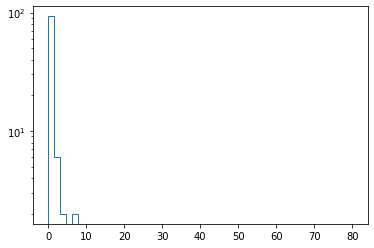

In [22]:
#plot charged generated particles
plt.figure()
plt.yscale("log")
plt.hist (genparts['packedGenPart_pt'][isGenChg][0], bins=50, range=(0,80), histtype='step')

plt.show()

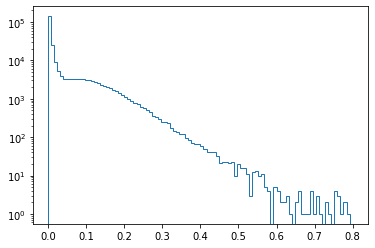

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
#plot charged generated particles matched with PF
plt.figure()
type_charge = genparts['packedGenPart_ptype']==1
plt.yscale("log")
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_toPFdR'][type_charge][:])), bins=100, range=(0,0.8), histtype='step')
plt.show()
plt.savefig("Packed_GenParticles.png")
f = plt.figure()


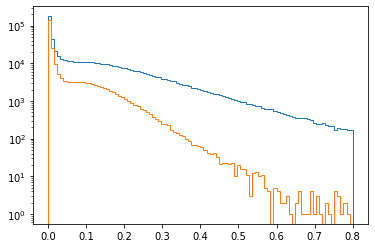

In [24]:
#plot charged generated particles matched with PF
plt.figure()
type_charge = genparts['packedGenPart_ptype']==1
all = genparts['packedGenPart_ptype']>0
plt.yscale("log")
x1=ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'][all][:]))
x2=ak.to_numpy(ak.flatten(genparts['packedGenPart_toPFdR'][type_charge][:]))

plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_toPFdR'][all][:])), bins=100, range=(0,0.8), histtype='step')
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_toPFdR'][type_charge][:])), bins=100, range=(0,0.8), histtype='step')
plt.show()
